## Вариант 21 Хайретдинов Тимур Сергеевич 382008-1
# Уравнение Кеплера
Уравнение Кеплера для вычисления орбиты имеет вид $𝑀=𝐸−𝜀sin𝐸$,

где 𝑀 – средняя аномалия, 𝐸 – эксцентрическая аномалия, 𝜀 – эксцентриситет орбиты. Пусть 𝑀=24.851090 , 𝜀=0.1.

Для примера возьмем планету Марс, т.к. примерно равные эксцентриситеты(используется только для простоения орбиты).

1)Изобразите полученную орбиту.

2)С помощью функции scipy.optimize.brentq найдите $E$.

3)Вычислите $E$ с помощью формулы

де $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$. 

4)Найдем $E$ по предыдущей формуле, используя равенство$$
      J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
    $$
    Проведите сравнение вычислительных затрат и точности результатов, полученных каждым из трех способов.

# Шаг 1
## Выведем уравнения кеплера 

### Эллипс-сплюснутая на велечину окружность
$ \sqrt{(1-e^2)}$ , где $e$ - эксцентриситет.
### Площадь эллипса равна: $$ S = \pi  a^2   \sqrt{(1-e^2)}$$ 
Где $ a $ - большая полуось 

### Согласно второму закону Кеплера, который гласит, что площадь, заметаемая радиус-вектором небесного тела пропорциональна времени, можно написать
$ S(t) = \pi a^2 \sqrt{1-e^2} (\frac{(t-t0)}{T})$ 

где T — период обращения, t — текущее время, t0 — момент времени прохождения перигелия (ближайшей к Солнцу точки орбиты).

Найдем теперь зависимость этой площади от положения небесного тела на орбите, то есть от величины радиус-вектора r и истинной аномалии — угла между перигелием и небесным телом, если смотреть с Солнца.

Для этого введем дополнительную переменную — эксцентрическую аномалию E.
Направим ось x от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид (прямой, соединяющей перицентр с апоцентром).
Создадим также вспомогательную окружность с радиусом, равным большой полуоси эллипса.
#### (тут должна быть картинка, загрузил ее в репозиторий)
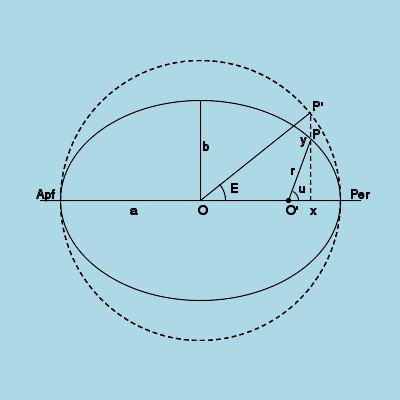


### Абсцисса небесного тела в точке P будет равна: 
$$ x = a cosE - ae $$
### Ордината будет, соответственно, равна
$$ y = \sqrt{1-e^2} a sinE $$
### Таким образом: 
$$ x = r cos(\varphi)  = a(cosE - e)$$
$$ y = r sin(\varphi) = a \sqrt{1-e^2} sinE $$

Для вычисления площади S рассмотрим вспомогательные фигуры: Сектор окружности
$P'-O-Per :$
$$ S1 =\frac{a^2 E}{2} $$

Сектор эллипса $P-O-Per$
$$ S2 = \sqrt{1-e^2} S1 $$

Треугольник $ O-O'-P$
$$ S3 = \frac{1}{2} y a e = \frac{1}{2} a^2 e \sqrt{1-e^2} sinE $$

Сектор $P-O'-Per$
$$S=S2-S3$$
### Отсюда площадь S равна:
$$ S(t) = \frac {1}{2} a^2 \sqrt{1-e^2}(E-e sinE) $$
### Сравнивая это выражение с выведенным ранее из второго закона Кеплера, получаем:
$$ E(t)-e sinE(t) = M(t) $$
Где $M(t) = 2 \pi \frac {t-t0}{T} $
### Это и есть уравнение Кеплера


#### Источник : https://habr.com/ru/post/209106/#:~:text=Согласно%20второму%20закону%20Кеплера%2C%20который,(ближайшей%20к%20Солнцу%20точки%20орбиты)

# Шаг 2
## Построим орбиту
Большая полуось марса = 149600000*1.52

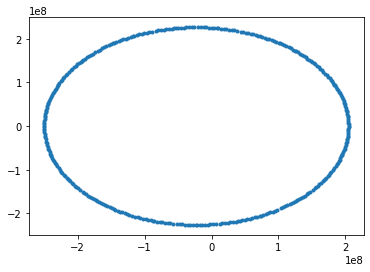

In [41]:
from numpy import*
from matplotlib.pyplot import*
%matplotlib inline
M=24.851090 # дано
e = 0.1 # дано
N=360
a = 149600000*1.52

def x(E):
    rez = a*(cos(E)-e)
    return rez
def y(E):
    rez = a*sin(E)*sqrt(1-e**2)
    return rez
E = [i for i in range(0,N)]
X=array([x(j) for j in E])
Y=array([y(j) for j in E])
figure()
plot (X, Y, ".")
pass

# Шаг3
## Вычисление E при помощи scipy.optimize.brentq:

In [10]:
from scipy import optimize
from math import*
from numpy import*

𝑀=24.851090 # дано
e=0.1 # дано

def func(E):
    rez = E-e*sin(E)-M
    return rez
E_otv=optimize.brentq(func,-100,100)
print(E_otv)

24.820357182542907


# Шаг 4
## Вычислим $E$ с помощью формулы

 В python есть функция special.jv - Функция Бесселя первого рода, будем использовать ее

In [36]:
sum=0
M=24.851090 # дано
e=0.1 # дано
count_elem = 1
while count_elem!=1000:
    sum+=(1/count_elem)*special.jv(count_elem, e)*sin(count_elem*M)
    count_elem+=1
rez = M + 2*sum
print(rez)

24.822653088245808


# Шаг 5
## Вычислим Е с помощью предыдущей формулы и формулы для вычисления функции Бесселя 
$$
      J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
    $$

In [44]:
from sympy import*
from scipy import special
from math import*
sympy.init_session()
e=0.1
M=24.85109
def J(m,e):
    rez = Sum(((-1)**n * (m*e/2)**(2*n+m))/(factorial(n)*factorial(m+n)),[n,0,oo])
    return rez
def E(M):
    rez =  M+2*Sum((1/m)*J(m,e)*sin(m*M),[m,1,oo])
    return rez
rez = E(M).evalf()
print(rez)

IPython console for SymPy 1.8 (Python 3.8.8-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/

24.8203571859165


# Заключение
## В ходе данной работы были сделаны следующие выводы:
### 1)Погрешность вычисления $E$ есть. Наибольшее отклонение от дургих способов имеет способ №2. 
### 2) Самым долгим по времени работы является последний способ, остальные способы работают примерно одинаково и достаточно быстро.